# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q2, and one of Q1 or Q3.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
! git clone https://github.com/KaranRawatUVA/wrangling/

fatal: destination path 'wrangling' already exists and is not an empty directory.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
current_directory = os.getcwd()
print(current_directory)


/content


1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)


I first got rid of all the commas by replacing it with an empty string and changing it into a float

Then I changed every value from s string into a numeric value.

I did not end up with any missing values

In [58]:
dfAir = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv')




dfAir['Price'] = dfAir['Price'].str.replace(',', '').astype(float)
#all I did was repalce an commas with an empty string, to get rid of the commas

#dfAir['Price'].values.tolist()


pd.to_numeric(dfAir['Price'], errors='raise') # I changed every value into a numeric value


dfAir = dfAir.sort_values(by='Price', ascending=False)
dfAir['Price']

# I ended up with 0 missing values

,Price
23927,10000.0
4002,8000.0
17900,6500.0
2405,5999.0
24136,5000.0
...,...
9793,20.0
18209,20.0
30087,10.0
19275,10.0


2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?


9848/12925 of the values are missing. This is concerning because arround 76% of the values are missing. This means police are most times are not filling this data in, which means this colomn is mostly useless for trying to figure out patterns for this variable.


Most of the missing data comes from bodily force force type (7051/9848) and secondly comes from chemical irritant (1421/9848). Third is tasor force (985/9848). One thing to note, most of the provided subject_injury does come from force_type of bodily force.


In [59]:
df_MP = pd.read_csv('/content/wrangling/assignment/data/mn_police_use_of_force.csv')
df_MP['subject_injury'] = df_MP['subject_injury'].fillna('missing')

df_MP['subject_injury'].value_counts()

,count
subject_injury,
missing,9848
Yes,1631
No,1446


In [70]:

pd.crosstab(df_MP['subject_injury'], df_MP['force_type'])


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
missing,2,7051,1421,0,27,74,87,0,170,31,985


3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.


In [80]:

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df_pd = pd.read_csv(url,low_memory=False)


In [87]:
df_pd = pd.read_csv(url,low_memory=False)

In [88]:
df_pd_updated = df_pd.copy()

df_pd_updated['WhetherDefendantWasReleasedPretrial'].value_counts()

df_pd_updated.loc[(df_pd['WhetherDefendantWasReleasedPretrial'] != 1) & (df_pd['WhetherDefendantWasReleasedPretrial'] != 0), 'WhetherDefendantWasReleasedPretrial'] = np.NaN

df_pd_updated['WhetherDefendantWasReleasedPretrial'].unique()

array([nan,  0.,  1.])

4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [113]:
df_pd_mv = df_pd_updated.copy()


#Imposed Sentence (ImposedSentenceAllChargeInContactEvent)
#Definition: Measured as the total imposed sentence term for any charges in the October 2017 contact event
#resulting in a conviction (in months)

#Sentence Type (SentenceTypeAllChargesAtConvictionInContactEvent)
#Definition: measured as the sentence type for all charges in the October 2017 contact event at conviction.
#Probation/no incarceration 0
#Jail up to 12 months 1
#Prison (one year or more) 2
#Other, all charges in cohort contact resulted in pending, dismissed,
#deferred, etc. 4
#Not applicable (e.g., disposition record not found, or unknown) 9


df_pd_mv['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df_pd_mv['ImposedSentenceAllChargeInContactEvent'], errors='coerce')
df_pd_mv['SentenceTypeAllChargesAtConvictionInContactEvent'] = pd.to_numeric(df_pd_mv['SentenceTypeAllChargesAtConvictionInContactEvent'], errors='coerce')

#df_pd_mv[['ImposedSentenceAllChargeInContactEvent', 'SentenceTypeAllChargesAtConvictionInContactEvent']]



#df_pd_mv.loc[ (df_pd_mv['SentenceTypeAllChargesAtConvictionInContactEvent'] == 0), 'ImposedSentenceAllChargeInContactEvent'] = 0


df_pd_mv[['ImposedSentenceAllChargeInContactEvent', 'SentenceTypeAllChargesAtConvictionInContactEvent']]


,ImposedSentenceAllChargeInContactEvent,SentenceTypeAllChargesAtConvictionInContactEvent
0,NaN,9
1,60.000000,0
2,12.000000,1
3,0.985626,1
4,NaN,4
...,...,...
22981,NaN,4
22982,NaN,9
22983,NaN,4
22984,NaN,4


from matplotlib import pyplot as plt
_df_0['ImposedSentenceAllChargeInContactEvent'].plot(kind='hist', bins=20, title='ImposedSentenceAllChargeInContactEvent')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['SentenceTypeAllChargesAtConvictionInContactEvent'].plot(kind='hist', bins=20, title='SentenceTypeAllChargesAtConvictionInContactEvent')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='ImposedSentenceAllChargeInContactEvent', y='SentenceTypeAllChargesAtConvictionInContactEvent', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['ImposedSentenceAllChargeInContactEvent'].plot(kind='line', figsize=(8, 4), title='ImposedSentenceAllChargeInContactEvent')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['SentenceTypeAllChargesAtConvictionInContactEvent'].plot(kind='line', figsize=(8, 4), title='SentenceTypeAllChargesAtConvictionInContactEvent')
plt.gca().spines[['top', 'right']].set_visible(False)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.


In [35]:
# 1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.

df = pd.read_excel('/content/wrangling/data/GSAF5.xls')


2. Drop any columns that do not contain data.


In [36]:
#2 Drop any columns that do not contain data.

updated = df.dropna(axis = 1, how = 'all')
#updated.head()

#print(len(df. columns))
#print(len(updated. columns))
#updated[updated['original order'].notna()]

3. Clean the year variable.


In [37]:
#3 Clean the year variable.
# Describe the range of values you see.
updated['Year'].describe()
# There is a range from 0 to 2026, with a std of 272.082794 and mean of 1935.018598
# There should not be a 2026 variable because that year has not happened, so I will get rid of it

updated = updated[updated['Year'] != 2026] #gets rid of 2026 because that has not happened yet

#years = updated['Year'].tolist()
#print(years)

Filter the rows to focus on attacks since 1940.

In [38]:
# Filter the rows to focus on attacks since 1940.
updated_filtered = updated[updated['Year'] >= 1940]
updated_filtered['Year'].describe()

,Year
count,5455.000000
mean,1991.918790
std,24.077589
min,1940.000000
25%,1969.000000
50%,2000.000000
75%,2013.000000
max,2025.000000


Are attacks increasing, decreasing, or remaining constant over time?

Year
2015.0    143
2017.0    140
2016.0    131
2011.0    128
2014.0    126
         ... 
1946.0     26
1979.0     25
1940.0     24
1945.0     16
2025.0      4
Name: count, Length: 86, dtype: int64


<Axes: xlabel='Year'>

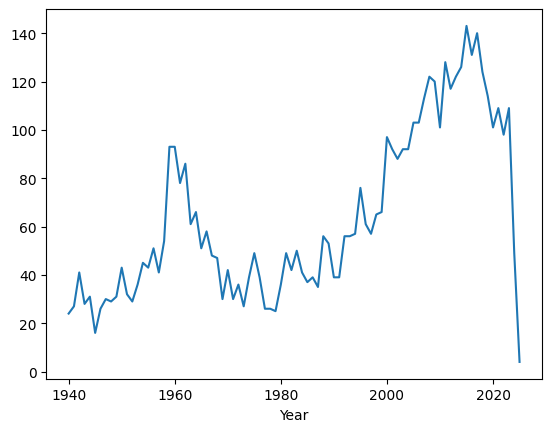

In [39]:
# Are attacks increasing, decreasing, or remaining constant over time?

year_counts = updated_filtered['Year'].value_counts()
print(year_counts)
year_counts = year_counts.sort_index()

year_counts.head()
year_counts.plot(x='Year', y='', kind='line')


# Attacks seem to be increasing over time. There is a dip in 2025 because those full years have not happened yet.
# 1960s have a huge spike but overall it seems attacks have increased over time

Attacks seem to be increasing over time. There is a dip in 2025 because those full years have not happened yet.

1960s have a huge spike but overall it seems attacks have increased over time

4. Clean the Age variable and make a histogram of the ages of the victims.


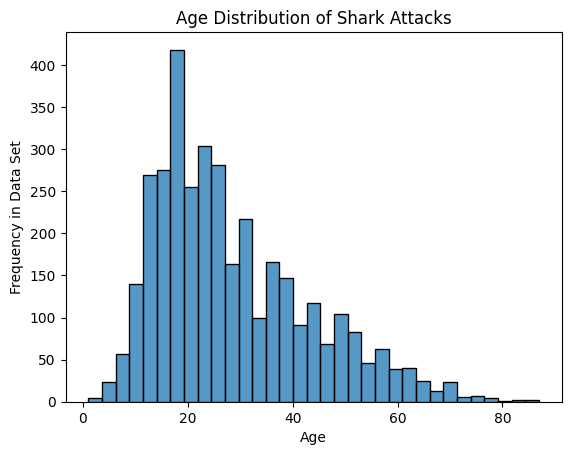

In [94]:
# 4 Clean the Age variable and make a histogram of the ages of the victims.

age_filtered = updated_filtered.copy()

age_filtered['Age'] = pd.to_numeric(age_filtered['Age'], errors='coerce') # changes to numeric value, but if can't changes it to NaN

# Drop NaN values
age_filtered = age_filtered.dropna(subset=['Age'])

#age_filtered.head()
#age_filtered['Age'].tolist()

ax = sns.histplot(data=age_filtered, x='Age')
ax.set_title('Age Distribution of Shark Attacks')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency in Data Set')


plt.show()


5. What proportion of victims are male?

      The proportion is 2981: 544 (M:F)

In [41]:
# 5 What proportion of victims are male?
gender_filtered = age_filtered.copy()

gender_filtered['Sex'] = age_filtered['Sex'].str.strip()

gender_proportion = gender_filtered['Sex'].value_counts()

gender_proportion

gender_filtered

# The proportion is 2981: 544 (M:F)

# Filtering out the other values
gender_filtered.drop(gender_filtered[gender_filtered['Sex'] == 'lli'].index, inplace=True)

gender_proportion = gender_filtered['Sex'].value_counts()
gender_proportion




,count
Sex,
M,2979
F,544


6. Clean the Type variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?





Unprovoked attacks make up 2956/3557 attacks

In [43]:
# 6 Clean the Type variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

type_changed = gender_filtered.copy()


type_changed.loc[(type_changed['Type'] != 'Provoked') & (type_changed['Type'] != 'Unprovoked'), 'Type'] = 'Unknown'


type_df = type_changed['Type'].value_counts()

type_df




# Unprovoked attacks make up 2956/3557 attacks

,count
Type,
Unprovoked,2954
Unknown,310
Provoked,291


7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.





In [44]:
# 7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.


fatal_changed = type_changed.copy()

fatal_changed['Fatal Y/N'] = type_changed['Fatal Y/N'].str.strip()

fatal_changed.loc[(fatal_changed['Fatal Y/N'] != 'N') & (fatal_changed['Fatal Y/N'] != 'Y'), 'Fatal Y/N'] = 'Unknown'


fatal_df = fatal_changed['Fatal Y/N'].value_counts()

fatal_df




,count
Fatal Y/N,
N,2821
Y,518
Unknown,216


8. A: Are sharks more likely to launch unprovoked attacks on men or women?

In [48]:
# 8. A: Are sharks more likely to launch unprovoked attacks on men or women?


pd.crosstab(fatal_changed['Type'], fatal_changed['Sex'])


# Sharks are more likely to launch unprovoked attacks on women (475/518= ~92%) then men (2459/2823 = ~87%) if you look at it at a rate basis
# However by raw volume, the unprovoke attack men more

Sex,F,M
Type,,
Provoked,21,265
Unknown,48,257
Unprovoked,475,2457


B: Is the attack more or less likely to be fatal when the attack is provoked or unprovoked?


  the attack is less likely to be fatal when it is provoked (8/291 = ~2.7%) than unprovoked (482/2956 = ~16%)


In [49]:
# Is the attack more or less likely to be fatal when the attack is provoked or unprovoked?



pd.crosstab(fatal_changed['Type'], fatal_changed['Fatal Y/N'])


# the attack is less likely to be fatal when it is provoked (8/291 = ~2.7%) than unprovoked (482/2956 = ~16%)


Fatal Y/N,N,Unknown,Y
Type,,,
Provoked,280,3,8
Unknown,87,195,28
Unprovoked,2454,18,482


C: Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

It is more likely to be fatal when a male (438/2981 = ~15%) is a victim than female (73/544 = ~13%).

I still feel sharks are cool creatures. Their kill rate is not that high. People should be more careful about where they swim. The mail versus female ratio isn't different enough for me, as a male, to be concerned they are targetting men.


In [51]:
# Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?



pd.crosstab(fatal_changed['Sex'], fatal_changed['Fatal Y/N'])


# It is more likely to be fatal when a male (438/2981 = ~15%) is a victim than female (73/544 = ~13%)


Fatal Y/N,N,Unknown,Y
Sex,,,
F,436,35,73
M,2364,177,438


9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)


The proportion is 446 / 3557 (white sharks/total sharks) or 12% white sharks



In [52]:
# 9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

fatal_changed['Species '] = fatal_changed['Species '].str.strip()

white_shark_count = 0
total_shark_count = 0
for i in fatal_changed['Species ']:
  if type(i) == str and 'white shark' in i.lower():
    #print(i)
    white_shark_count += 1
  total_shark_count += 1

print(white_shark_count, "/", total_shark_count)
print(int((white_shark_count/total_shark_count) * 100),'%')

446 / 3555
12 %


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?